# Midi 32 bit Encoder

Testing and examples of taking a midi file, turning the events into an array of integers, and then writing them to disk. This is the preprocessing step before training the model.

In [10]:
%pip install -r requirements.txt --upgrade

Note: you may need to restart the kernel to use updated packages.


- $S_1$ the step when the note happens in seconds
- $D_1$ the duration of the note - when the note ends in seconds
- $P_1$ the pitch of the note (C1, D#4, etc)
- $V_1$ the velocity of the note

---

- $B$ bin size - the bits to pack into 255
- $S_2$ the encoded step
- $D_2$ the encoded duration

**Step Encoding and Decoding**

$$ S_2 = B\frac{S_1}{100} $$
$$ S_1 = 100\frac{S_2}{B} $$

**Duration Encoding and Decoding**

$$ D_2 = B\frac{D_1}{100} $$
$$ D_1 = 100\frac{D_2}{B} $$


## Imports

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
import midichar

## Test Writing Header

In [12]:
# Testing Header
header = midichar.encode_header(11, 135, 4, 4)
print(header)
midichar.decode_header(header)

755524


(11, 135, 4, 4)

## Encode Midi File 32bit Int

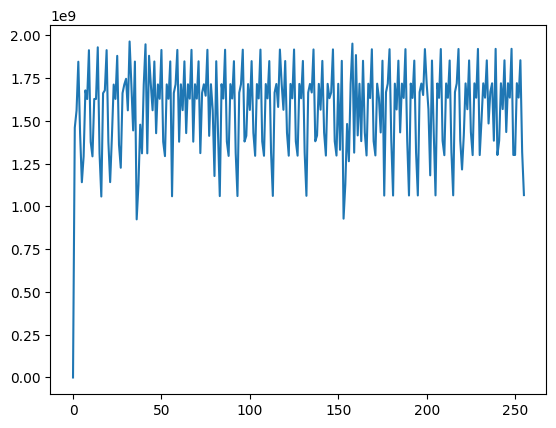

In [13]:
ITEM_SIZE=256 #(48)

enc = midichar.encode_midi(
    midi_file="datasets/lmd_full/0/0a0b59b984e78fccd380b44938a17ad4.mid",
    # midi_file="datasets/lmd_full/0/0a0c8865e48111d4359a3337fc574eb8.mid",
    # midi_file="datasets/lmd_full/8/8a00aeee9cab818caffc14b222792274.mid",
    # midi_file="datasets/lmd_full/e/effe28f39d533cadc378831ecb6c896d.mid",
    # midi_file="datasets/lmd_full/9/9a0aaf641159a6ce96ceffc917cce574.mid",
    window_size=ITEM_SIZE,
    # instrument_index=0
    instrument_name="Standard Kit",
    )

if enc is not None:
    plt.plot(enc)


### Display at Image

16 256


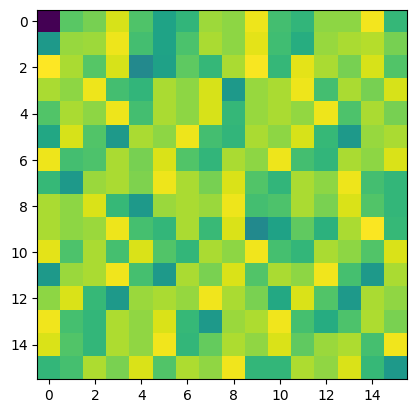

In [14]:
sqr = int(math.sqrt(ITEM_SIZE))
print(sqr, ITEM_SIZE)
plt.imshow(np.reshape(enc, (-1,sqr)))
plt.show()

## Decode 32 bit Integer Midi

In [15]:
print(midichar.decode_header(enc[0]))
midichar.decode_midi(notes=enc,
                     out_file="output/test.mid",
                     instrument_name="Standard Kit")

(0, 118, 4, 4)


## Serialize / Deserialize Sample

In [16]:
str = midichar.serialize_notes(enc, "output/test.data")

In [17]:
ary = midichar.deserialize_notes("output/test.data")
print(ary.shape)

(256,)


### Ensure Sample Deserialize  

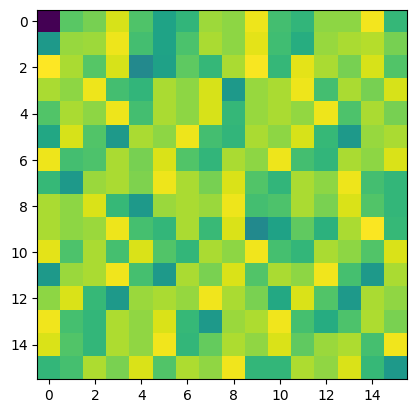

In [18]:
sqr = int(math.sqrt(ITEM_SIZE))
plt.imshow(np.reshape(ary, (-1,sqr)))
plt.show()